# Question 3 : How does the number of people flying between different locations change over time?

### Read neccesary libraries

In [ ]:
import pandas as pd
from datetime import datetime
import sqlite3 as sqlite3
import pyarrow as pa
import pyarrow.csv as pcsv
import matplotlib.pyplot as plt
import igraph as ig


### Read data connect to SQL and append data to table

In [2]:

# Read the data
d1 = pcsv.read_csv("D:/R files/2004.csv").to_pandas()
d2 = pcsv.read_csv("D:/R files/2005.csv").to_pandas()
d3 = pcsv.read_csv("D:/R files/2006.csv").to_pandas()
plane_data = pd.read_csv("D:/R files/plane-data.csv")
airports = pcsv.read_csv("D:/R files/airports.csv").to_pandas()

conn = sqlite3.connect("Coursework_1234.db")
c = conn.cursor()

# Remove table if it exists
c.execute('''DROP TABLE IF EXISTS d36''')
# Remove table if it exists
c.execute('''DROP TABLE IF EXISTS airports''')

# Remove table if it exists
c.execute('''DROP TABLE IF EXISTS plane_data''')

#use .to_sql to create the tables and data from jupyter to SQL
airports.to_sql('airports', con = conn, index = False)
plane_data.to_sql('plane_data',con=conn,index=False)
d1.to_sql('d36', conn, if_exists='append', index=False)
d2.to_sql('d36', conn, if_exists='append', index=False)
d3.to_sql('d36', conn, if_exists='append', index=False)


# Remove dataframes from memory
del d1, d2, d3

In [5]:
## Fetch data from sql using sql command
query = c.execute('''
SELECT d36.Year, d36.Month, d36.DayOfMonth,d36.Origin,d36.Dest,a1.city,a1.airport
FROM d36 
INNER JOIN airports a1 ON d36.Dest = a1.iata
''').fetchall()

In [5]:
#changing df from a list to a dataframe which will be used for plotting graphs
df = (pd.DataFrame(query, columns = ['Year','Month','Day','Origin','Dest','city','airport'])) 

In [6]:
## del query for memory purposes
del query

In [6]:

### Get top 10 airports based on their number of flights 
df_grouped = df.groupby('Origin').size().reset_index(name='Count')
top = df_grouped.nlargest(10, 'Count')
top = top['Origin'].tolist()

NameError: name 'df' is not defined

In [8]:
import numpy as np

# Filter and group the data
df_filtered = df[ (df['Dest'].isin(top)) &
           (~df['Year'].isna()) & (np.isfinite(df['Year'])) &
           (~df['Month'].isna()) & (np.isfinite(df['Month']))]
grouped = df_filtered.groupby(['Month', 'Year', 'Dest']).size().reset_index(name='Total_Flights')

#This code block creates a new column in a Pandas DataFrame called grouped called 'Date', 
#which contains the first day of the month for each 'Year'-'Month' combination in the DataFrame.

grouped['Date'] = pd.to_datetime(grouped['Year'].astype(int).astype(str) + '-' + grouped['Month'].astype(int).astype(str) + '-01')

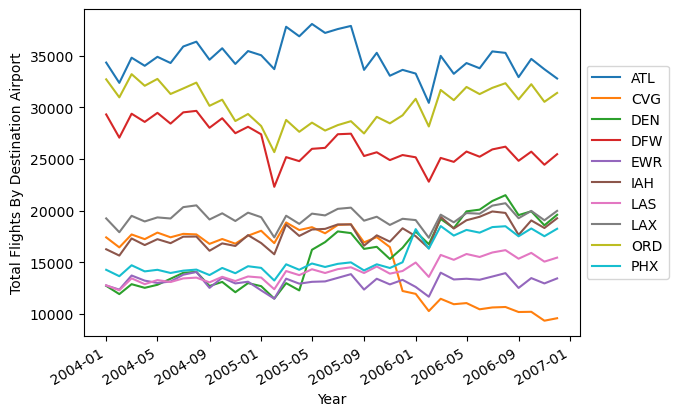

In [9]:
#This code block sets the 'Date' column as the index of the grouped DataFrame using the set_index() 
#method with the inplace=True parameter. Then, it groups the data by the 'Dest' column, and plots the 
#'Total_Flights' data for each destination airport on the same graph using the plot() method with the 
#xlabel and ylabel parameters set to "Year" and "Total Flights By Destination Airport", respectively.
#Finally, it adds a legend to the plot using the legend() method with the loc and bbox_to_anchor parameters 
#set to position the legend on the right side of the graph.




grouped.set_index("Date", inplace=True)
ax = grouped.groupby("Dest")["Total_Flights"].plot(legend=False, xlabel="Year", ylabel="Total Flights By Destination Airport")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

D:\musad\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


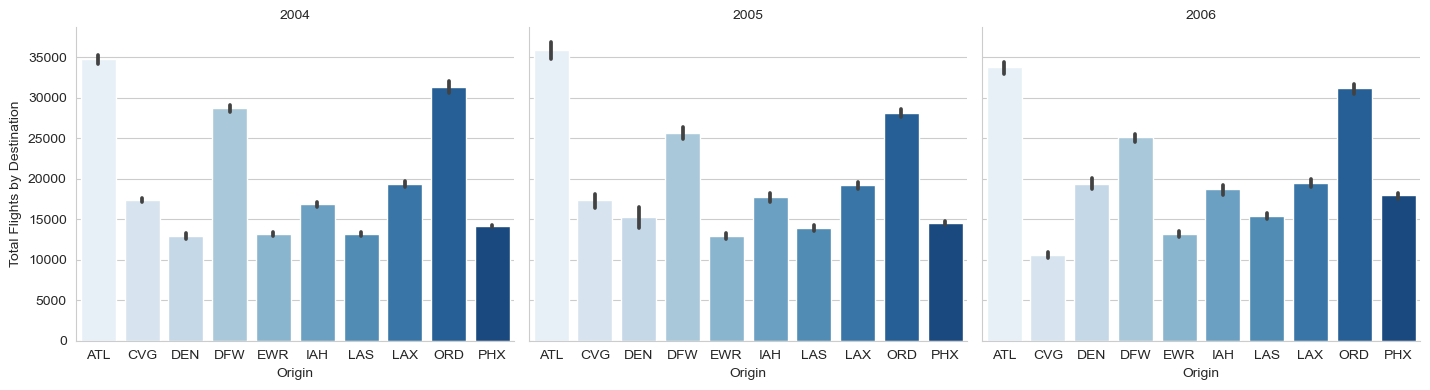

In [11]:
#This code block uses the seaborn library to create a FacetGrid object that plots bar graphs of the total
#number of flights to each destination airport, grouped by year. The sns.set_style() function sets the visual style
#of the plot to "whitegrid".
#The FacetGrid() function is used to create a grid of subplots, with one column for each year in the dataset. 
#The map() method is used to plot a bar graph of the total number of flights to each destination airport for each year. 
#The set_titles() and set_axis_labels() methods are used to add titles and axis labels to the plot.
#import seaborn as sns

sns.set_style("whitegrid")

g = sns.FacetGrid(grouped, col="Year", height=4, aspect=1.2)
g.map(sns.barplot, "Dest", "Total_Flights", palette="Blues")
g.set_titles("{col_name}")
g.set_axis_labels("Origin", "Total Flights by Destination")

In [12]:
del df,grouped

In [3]:
query2 = c.execute('''
SELECT d36.Year, d36.Month, d36.DayOfMonth,d36.Origin,d36.Dest,a1.city,a1.airport
FROM d36 
INNER JOIN airports a1 ON d36.Origin = a1.iata
''').fetchall()

In [4]:
#changing df from a list to a dataframe which will be used for plotting graphs
df1 = (pd.DataFrame(query2, columns = ['Year','Month','Day','Origin','Dest','city','airport']))

In [7]:
df_grouped = df1.groupby('Origin').size().reset_index(name='Count')
top = df_grouped.nlargest(10, 'Count')
top = top['Origin'].tolist()

In [8]:
import numpy as np

# Filter and group the data
df_filtered = df1[ (df1['Origin'].isin(top)) &
           (~df1['Year'].isna()) & (np.isfinite(df1['Year'])) &
           (~df1['Month'].isna()) & (np.isfinite(df1['Month']))]
grouped = df_filtered.groupby(['Month', 'Year', 'Origin']).size().reset_index(name='Total_Flights')

grouped['Date'] = pd.to_datetime(grouped['Year'].astype(int).astype(str) + '-' + grouped['Month'].astype(int).astype(str) + '-01')

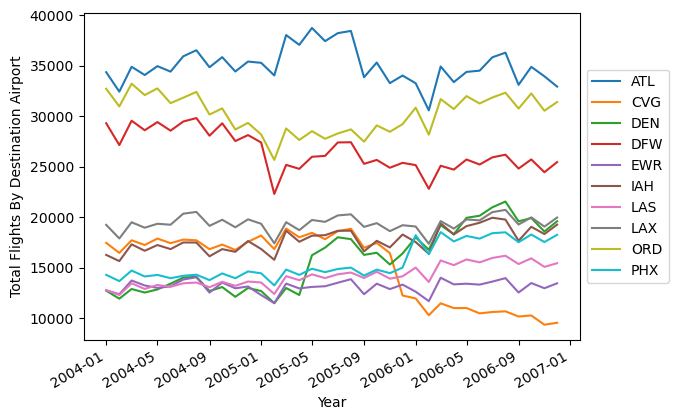

In [11]:
grouped.set_index("Date", inplace=True)
ax = grouped.groupby("Origin")["Total_Flights"].plot(legend=False, xlabel="Year", ylabel="Total Flights By Destination Airport")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

D:\musad\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


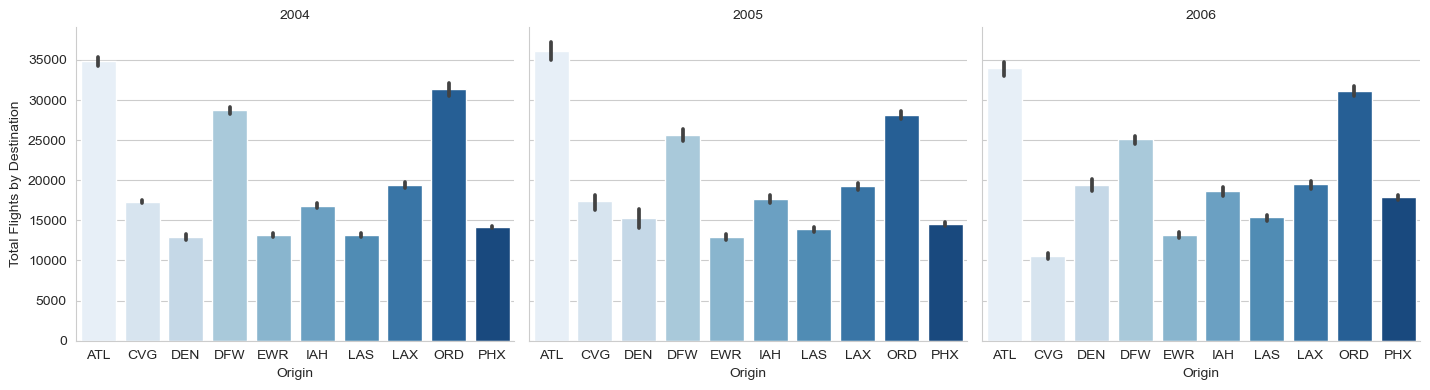

In [13]:

import seaborn as sns

sns.set_style("whitegrid")

g = sns.FacetGrid(grouped, col="Year", height=4, aspect=1.2)
g.map(sns.barplot, "Origin", "Total_Flights", palette="Blues")
g.set_titles("{col_name}")
g.set_axis_labels("Origin", "Total Flights by Destination")